Explain the Nature of the Project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.datasets import make_s_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statistics as st



Explain the GSS

In [2]:
#Bring in the dataset
##Add a second index column, making it easier to find missing values.
gss=pd.read_csv("GSS_1996.csv", encoding="latin1")
gss['gss_index'] = gss.index
gss.head()

,found,occ10,occindv,occstatus,occtag,prestg10,prestg105plus,indus10,indstatus,indtag,...,old10,old13,relate10,relate13,relhhd10,relhhd13,where11,where6,death,gss_index
0,not foun,retail s,IAP,not foun,not foun,31,18,hardware,not foun,not foun,...,IAP,IAP,IAP,IAP,IAP,IAP,IAP,IAP,possibly,0
1,found,retail s,verbatim,"found, c",found,31,18,clothing,"found, c",found,...,IAP,IAP,IAP,IAP,IAP,IAP,IAP,IAP,possibly,1
2,found,pipelaye,verbatim,"found, c",found,43,50,petroleu,"found, c",found,...,IAP,IAP,IAP,IAP,IAP,IAP,IAP,IAP,possibly,2
3,found,preschoo,verbatim,"found, c",found,53,68,child da,"found, c",found,...,IAP,IAP,IAP,IAP,IAP,IAP,IAP,IAP,possibly,3
4,found,sewing m,verbatim,"found, c",found,32,22,cut and,"found, c",found,...,IAP,IAP,IAP,IAP,IAP,IAP,IAP,IAP,possibly,4


Explain how the data needs to be cleaned, including:
1. getting rid of missing on the dv
2.of which some are because they werent asked bcause couldn't recall angry event.
3. how each variable needs to be recoded

In [3]:
#Replace actual null values with word "null" to make coding easier.
gss.fillna(value="null", inplace=True)
#Define all answers which constitute missing values
badanswers=["null","NA","IAP","DK", ".a", ".i", "NA"]
#Replace these answers with "null"
for answer in badanswers:
    gss.replace(answer,"null", inplace=True)

In [4]:
##drop cases with missing values on the DV.
for answer in badanswers:
    dropindex = gss[ (gss['chnang7'] == answer)].index
    gss.drop(dropindex , inplace=True)


In [5]:
#Make DV a dummy variable called pray_anger
pray_anger=[]
for answer in gss["chnang7"]:
    if answer=="didnt":
        pray_anger.append(0)
    elif answer=="did":
        pray_anger.append(1)
    else:
        print("Value Error: Please recode data to omit all values that are not 'did' or 'didn't'")

In [6]:
#Reshape the DV for sklearn
DVpray_anger=np.array(pray_anger)
DVpray_anger.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [7]:
#################
#Recoding the IVs
#################

#Making Dummies... almost.
#We cannot recode dummy variables using the pandas get_dummies command because we want to preserve the missing data on each of the IVs. We are doing this so that we can multiple-impute them later. 

In [8]:
##Sex (to dummy variable)

missingcounter=0
sex=[]
for answer in gss["sex"]:
    missingcounter+=1
    if answer=="male":
        sex.append(0)
    elif answer=="female":
        sex.append(1)
    elif answer=="null":
        sex.append(answer)
        print(f"missing value on sex at row {missingcounter}")
        df_missing=df_missing.append({"Variable": "sex", "Row": missingcounter}, ignore_index=True)
    else:
        print("Sex value error: {answer}.")

In [9]:
##Race(To dummy variable)
missingcounter=0
race=[]
for answer in gss["race"]:
    missingcounter+=1
    if answer=="white":
        race.append(0)
    elif answer=="black" or answer=="other":
        race.append(1)
    elif answer=="null":
        race.append(answer)
        print(f"missing value on race at row {missingcounter}")
        df_missing=df_missing.append({"Variable": "race", "Row": missingcounter}, ignore_index=True)
    else:
        print("Race value error: {answer}.")
##Education(To dummy variable with having degree as reference category)
missingcounter=0

In [10]:
#Education (To dummy variable)
education=[]
for answer in gss["degree"]:
    missingcounter +=1
    if answer =="bachelor" or answer=="graduate":
        education.append(0)
    elif answer=="lt high" or answer =="high sch" or answer=="junior c":
        education.append(1)
    elif answer=="null":
        education.append(answer)
        print(f"missing value on education at row {missingcounter}")
    else:
        print(f"education value error: {answer}.")
missingcounter=0

missing value on education at row 165


In [11]:
##Region (To dummy variable with not being from the south as a reference category)
##Note: the original study used "region of interview", but "region of residence" is a better indicator, and will be used here.
reg16_southanswers=["south at", "e. sou.", "w. sou."]
reg16_nonsouth=["foreign", "new engl", "middle a", "e. nor.", "w. nor.", "mountain", "pacific"]
missingcounter=0
south=[]

for answer in gss["reg16"]:
    missingcounter +=1
    if answer in reg16_southanswers:
        south.append(1)
    elif answer in reg16_nonsouth:
        south.append(0)
    elif answer=="null":
        south.append(answer)
        print(f"missing value on reg16 at row {missingcounter}")
    else:
        print(f"reg16 value error: {answer}.")
missingcounter=0



In [12]:
set(south)

{0, 1}

In [13]:
#Recoding marital status (To dummy varaible with non-married as the reference category)
reg16_nonmarried=["never ma", "divorced", "separate", "widowed"]

missingcounter=0
married=[]

for answer in gss["marital"]:
    missingcounter +=1
    if answer== "married":
        married.append(1)
    elif answer in reg16_nonmarried:
        married.append(0)
    elif answer=="null":
        married.append(answer)
    else:
        print(f"married value error {answer}.")
missingcounter=0

missing value on marital at row 255


In [29]:
#Number of children, recode to dummy. Has children is reference category.
childs = []
for answer in gss["childs"]:
    try:
        if int(answer)==0:
            childs.append(0)
        elif int(answer)>0:
            childs.append(1)
    except:
        if answer=="eight or":
            childs.append(1)
        elif answer=="null":
            childs.append(answer)

In [55]:
#Age, centered
#Note that this variable is not truely centered, since the top age category is "89 or
#older" and not simply "89".
age_numeric=[]
age_centered=[]
for answer in gss["age"]:
    if answer!="null" and answer != "89 or ol":
        age_numeric.append(int(answer))
for answer in gss["age"]:
    try:
        integer=int(answer)
        mean=st.mean(age_numeric)
        age_centered.append(integer-mean)
    except:
        if answer== "89 or ol":
            age_centered.append(89-mean)
        elif answer == "null":
            age_centered.append(answer)

In [59]:
#Recode fundamentalism variable to dummy, with fundamentalist as the reference category. Note that this variable has a new missing value category: "NA-EXCLUDED"
fund=[]
nonfund=["liberal","moderate"]
for answer in gss["fund"]:
    if answer =="fundamen":
        fund.append(1)
    elif answer in nonfund:
        fund.append(0)
    elif answer =="null" or answer=="NA-EXCLU":
        fund.append("null")
    else:
        print(f"{answer} is not a valid value")

In [62]:
#recode prayer frequency to dummy, at least once a day as reference category
pray=[]
daily=["lt once", "once a d"]
non_daily=["several", "never","once a w",]
for answer in gss["pray"]:
    if answer in daily:
        pray.append(1)
    elif answer in non_daily:
        pray.append(0)
    elif answer == "null":
        pray.append(answer)
    else:
        print(f"{answer} is not a valid answer")

Explain creating a dataframe to catch missing values

In [14]:
#HOW TO: reshape variables
x = np.array(sex).reshape(-1, 1)
y = np.array(pray_anger).reshape(-1, 1)

print("Shape: ", x.shape, y.shape)

Shape:  (1114, 1) (1114, 1)


In [372]:
#HOW TO: estimate model
from sklearn.linear_model import LogisticRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(x, y)

score = model.score(x, y)
print(f"R2 Score: {score}")

R2 Score: 0.02818222827970518


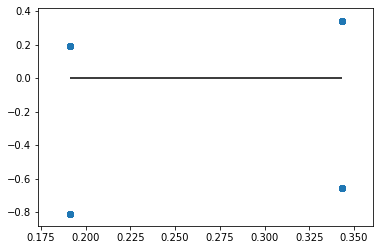

In [373]:
#HOW TO: plot residuals
predictions = model.predict(x)
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

array([[0.19117647],
       [0.34326019],
       [0.34326019],
       ...,
       [0.34326019],
       [0.19117647],
       [0.19117647]])

In [3]:
#Regression Function
#arg1=dataframe
#arg2=y variable (as named in dataframe, input as string)
#arg3-n=x variables (as named in dataframe)
def regress(*args):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    from sklearn import feature_selection
    dataframe=args[0]
    y=args[1]
    xvars=[]
    for i in range(2,len(args)):
        xvars.append(args[i])
    x = dataframe[[item for item in xvars]]
    y = dataframe[y]
    model.fit(x,y)
    



In [2]:
import statsmodels.api as sm
from patsy import dmatrices
df=cleansed_df[["Energy","Tempo","Loudness","Loudness_sq"]]
y,x = dmatrices("Energy ~ Tempo + Loudness + Loudness_sq", data=df, return_type="dataframe")
ols = sm.OLS(y, x)
ols_result = ols.fit()
print(ols_result.summary())

1


In [76]:
def regress(*args):
    #import dependencies
    import sklearn as sk
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    from sklearn import feature_selection
    import statsmodels.api as sm
    from patsy import dmatrices

    #define arguments
    dataframe=args[0]
    y=args[1]
    xvars=[]
    for i in range(2,len(args)):
        xvars.append(args[i])
    x = dataframe[[item for item in xvars]]
    y = dataframe[y].values.reshape(-1, 1)
    #fit the model
    model.fit(x,y)
    
    #Generate Fit Statistics
    ##prep data for patsy
    list=[]
    for item in xvars:
        list.append(f' + {item}')
    string="".join(list)
    newstring=string[3:]

    ind=args[1]
    ind=ind.strip('"')

    ##Get fitstats from patsy
    Y,X = dmatrices(f"{ind} ~ {newstring}", data=dataframe, return_type="dataframe")
    ols = sm.OLS(Y, X)
    ols_result = ols.fit()
    print(ols_result.summary())

    #Plot the Residuals
    print("\n Residual Plot")
    predictions = model.predict(x)
    plt.scatter(predictions, predictions - y, color='coral',linewidths=0.5)
    plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='brown', linewidth=3)
    plt.show()

In [88]:
def linregress(*args):
    #import dependencies
    import sklearn as sk
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    from sklearn import feature_selection
    import statsmodels.api as sm
    from patsy import dmatrices

    #define arguments
    dataframe=args[0]
    y=args[1]
    xvars=[]
    for i in range(2,len(args)):
        xvars.append(args[i])
    x = dataframe[[item for item in xvars]]
    y = dataframe[y]
    #fit the model
    model.fit(x,y)
    
    #Generate Fit Statistics
    ##prep data for patsy
    list=[]
    for item in xvars:
        list.append(f' + {item}')
    string="".join(list)
    newstring=string[3:]

    ind=args[1]
    ind=ind.strip('"')

    ##Get fitstats from patsy
    Y,X = dmatrices(f"{ind} ~ {newstring}", data=dataframe, return_type="dataframe")
    logit = sm.Logit(Y, X)
    logit_result = logit.fit()
    print(logit_result.summary())

    #Plot the Residuals
    print("\n Residual Plot")
    from sklearn.linear_model import Ridge
    from yellowbrick.datasets import load_concrete
    from yellowbrick.regressor import ResidualsPlot
    
    model = Ridge()

    visualizer = ResidualsPlot(model)
    y2= y.values.reshape(-1, 1)
    visualizer.fit(x, y2)  # Fit the training data to the visualizer
    visualizer.score(x, y2)  # Evaluate the model on the test data
    visualizer.show()                 # Finalize and render the figure

    #predictions = model.predict(x)
    #plt.scatter(predictions, predictions - y, color='coral',linewidths=0.5)
    #plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='brown', linewidth=3)
    #plt.show()

In [83]:
gss["sex2"]=sex
gss["educ"]=education

Optimization terminated successfully.
         Current function value: 0.682482
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   sex2   No. Observations:                 1114
Model:                          Logit   Df Residuals:                     1112
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Oct 2020   Pseudo R-squ.:               7.923e-05
Time:                        10:23:31   Log-Likelihood:                -760.28
converged:                       True   LL-Null:                       -760.34
Covariance Type:            nonrobust   LLR p-value:                    0.7285
                 coef    std err          z      P&gt;|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2575      0.119      2.170      0.030       0.025       0.490
educ           0.0479     

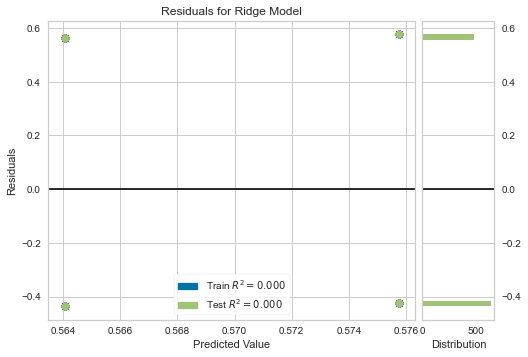

In [91]:
linregress(gss,"sex2","educ",)

In [81]:
len(sex)

1114